In [47]:
%matplotlib inline

import numpy
import pylab
from matplotlib.backends.backend_pdf import PdfPages

In [48]:
fps = 30
period = (1000//fps)
print period

33


## Linear time coding

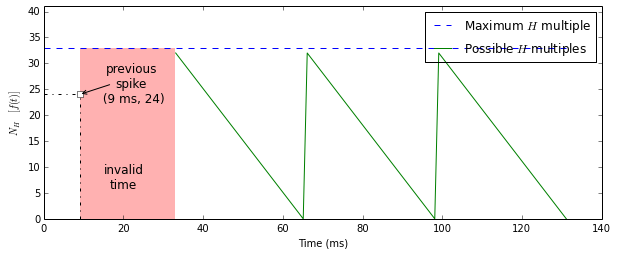

In [49]:
prev_t = 9
n_b = period
w_b = period/n_b
max_val = period
prev_h = period - prev_t

end_t = 4*period
start_t = period 
now_t = numpy.arange(start_t, end_t) + 0.1
#print now_t
diff_t = now_t - (prev_t - (n_b - prev_h*w_b))
#diff_t = now_t - (prev_t + prev_h*w_b)
#print diff_t
n_h_now = numpy.floor(n_b - numpy.mod(diff_t, period)/w_b)
#n_h_now = numpy.floor(n_b - diff_t//w_b)
#print n_h_now
fig_linear = pylab.figure(figsize=(10,4.5))
#pylab.axis('equal')
ax = fig_linear.add_subplot(111)

#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
ax.text(20, 6, 'invalid\ntime', fontsize=12, horizontalalignment='center')
ax.text(prev_t+13, prev_h-1.5, 'previous\nspike\n (%d ms, %d)'%(prev_t, prev_h), fontsize=12, horizontalalignment='center')
ax.annotate('', xy=(prev_t, prev_h), xytext=(prev_t+8, prev_h+2),
            horizontalalignment='center',
            verticalalignment='center',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
axes = pylab.gca()
axes.set_ylim([0,max_val + 8])
axes.set_aspect(1.3)
pylab.bar(prev_t, max_val, start_t - prev_t, color=(1., 0., 0., 0.3), linewidth=0.)
pylab.plot([0, end_t], [max_val, max_val], 'b--', label=r'Maximum $H$ multiple')
pylab.plot([prev_t, prev_t], [0, prev_h], '-.k')
pylab.plot([0, prev_t], [prev_h, prev_h], '-.k')
pylab.plot([prev_t], [prev_h], 'sk', markerfacecolor='white')
pylab.plot(now_t, n_h_now, 'g', label=r'Possible $H$ multiples')
#pylab.plot([period, period], [0, max_val])
pylab.legend()
pylab.xlabel("Time (ms)")
pylab.ylabel(r'$N_H \; [f(t)]$')
pylab.show()

## Exponential time coding

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 4 4 4 4 4]
4.71428571429
7
1.0
6.0
4.71428571429


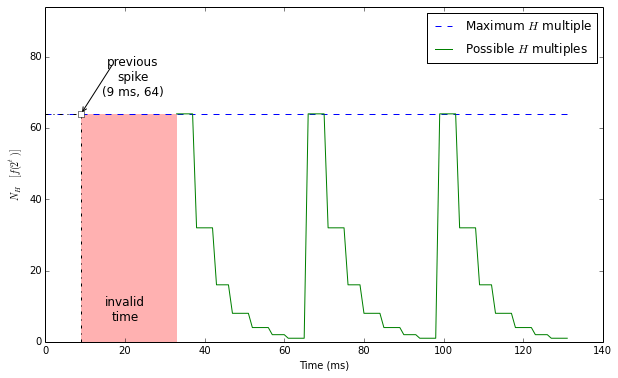

In [51]:
prev_t = 9
n_b = 7
w_b = float(period)/float(n_b)
#w_b = int(numpy.ceil(float(period)/float(n_b)))
#w_b = (period)//n_b
#n_b -= 1
print numpy.arange(period)//n_b
print w_b
print n_b
print prev_t//w_b
print n_b - prev_t//w_b
max_h = 2**(n_b-1)
end_t = 4*period
prev_h = 2**( numpy.floor( (n_b - prev_t//w_b)) )
start_t = period
now_t = numpy.arange(start_t, end_t)
#diff_t = now_t - (prev_t - 2*( n_b - numpy.log2(prev_h)*w_b + 1)) 
diff_t = now_t - (prev_t - (n_b - numpy.log2(prev_h) + 1)*w_b )
print ( n_b - numpy.log2(prev_h) )*w_b
#print diff_t
mod_diff_t = numpy.mod(diff_t, period)
n_bits_now = numpy.floor( n_b - mod_diff_t/w_b) 
#print n_bits_now
h_now = 2**(n_bits_now)
#n_h_now = 2**( numpy.floor(n_b - diff_t/w_b) )

fig_exp = pylab.figure(figsize=(10,6), dpi=300)
ax = fig_exp.add_subplot(111)
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
ax.text(20, 6, 'invalid\ntime', fontsize=12, horizontalalignment='center')
ax.text(prev_t+13, prev_h+5., 'previous\nspike\n(%d ms, %d)'%(prev_t, prev_h), fontsize=12, horizontalalignment='center')
ax.annotate('', xy=(prev_t, prev_h), xytext=(prev_t+8, prev_h+14),
            horizontalalignment='center',
            verticalalignment='center',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
axes = pylab.gca()
axes.set_ylim([0,max_h + 30])
pylab.bar(prev_t, max_h, period - prev_t, color=(1., 0., 0., 0.3), linewidth=0.)
pylab.plot([0, end_t], [max_h, max_h], 'b--', label=r'Maximum $H$ multiple')
pylab.plot([prev_t, prev_t], [0, prev_h], '-.k')
pylab.plot([0, prev_t], [prev_h, prev_h], '-.k')
pylab.plot([prev_t], [prev_h], 'sk', markerfacecolor='white')
pylab.plot(now_t, h_now, 'g', label=r'Possible $H$ multiples')
pylab.legend()
pylab.xlabel("Time (ms)")
pylab.ylabel(r'$N_H \; [f(2^t)]$')
pylab.savefig("spike_values_exp.pdf", format='pdf')
pylab.show()

5.5
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33]
[ 0.18181818  0.36363636  0.54545455  0.72727273  0.90909091  1.09090909
  1.27272727  1.45454545  1.63636364  1.81818182  2.          2.18181818
  2.36363636  2.54545455  2.72727273  2.90909091  3.09090909  3.27272727
  3.45454545  3.63636364  3.81818182  4.          4.18181818  4.36363636
  4.54545455  4.72727273  4.90909091  5.09090909  5.27272727  5.45454545
  5.63636364  5.81818182  6.        ]
[ 32.  32.  32.  32.  32.  16.  16.  16.  16.  16.  16.   8.   8.   8.   8.
   8.   4.   4.   4.   4.   4.   4.   2.   2.   2.   2.   2.   1.   1.   1.
   1.   1.   1.]


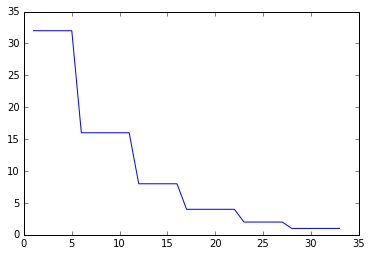

In [168]:
w_b = (float(period)/float(n_b))
print w_b
t_range = numpy.arange(1, period + 1)
print t_range
print t_range/w_b
h_range = 2**numpy.floor(n_b - t_range/w_b)
print h_range
fig_range = pylab.figure()
pylab.plot(t_range, h_range)
pylab.show()